In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import OrderedDict
from common import NWSL, Fonts, Images, Colors, add_signature

In [2]:
# Read in the data for the specified year and sort it
year = "2025"

df = pd.read_csv("data/" + year + "_schedule.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df = df.sort_values("date")
df

,date,time,home,away,network
0,2025-03-14,8:00 PM,HOU,WAS,NWSL+
1,2025-03-14,8:00 PM,ORL,CHI,Prime Video
2,2025-03-15,12:45 PM,KCC,POR,ABC
3,2025-03-15,5:00 PM,LOU,NC,NWSL+
4,2025-03-15,7:30 PM,UTA,BAY,ION
...,...,...,...,...,...
180,2025-11-02,NaN,POR,HOU,NaN
176,2025-11-02,NaN,CHI,LA,NaN
175,2025-11-02,NaN,KCC,SD,NaN
177,2025-11-02,NaN,LOU,BAY,NaN


In [3]:
# Bucket data into 0-4 days, 5-6 days, and 7+ day gaps
buckets = [(0, 4), (5, 6), (7, 60)]

results = {}
for team in df.home.unique():
    games = df[(df["home"] == team) | (df["away"] == team)]
    gaps = list(
        sorted([x.days for x in games.date.diff().tolist()[1:]]),
    )

    count = []
    for low, high in buckets:
        count.append(len(list(filter(lambda x: x >= low and x <= high, gaps))))
    results[team] = count

results = OrderedDict(sorted(results.items(), key=lambda i: i[1][0] * 10 + i[1][1]))
results

OrderedDict([('KCC', [0, 5, 20]),
             ('LOU', [0, 6, 19]),
             ('UTA', [0, 7, 18]),
             ('RGN', [0, 7, 18]),
             ('SD', [0, 7, 18]),
             ('NC', [0, 7, 18]),
             ('ORL', [0, 8, 17]),
             ('BAY', [0, 8, 17]),
             ('WAS', [0, 8, 17]),
             ('HOU', [0, 9, 16]),
             ('LA', [0, 9, 16]),
             ('CHI', [1, 4, 20]),
             ('POR', [1, 10, 14]),
             ('GFC', [2, 9, 14])])

In [4]:
# Generate some constants to prepare for the visualization
labels = list([NWSL.name(i) for i in results.keys()])
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap("Blues_r")(np.linspace(0.15, 0.85, data.shape[1]))

<Figure size 1728x972 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

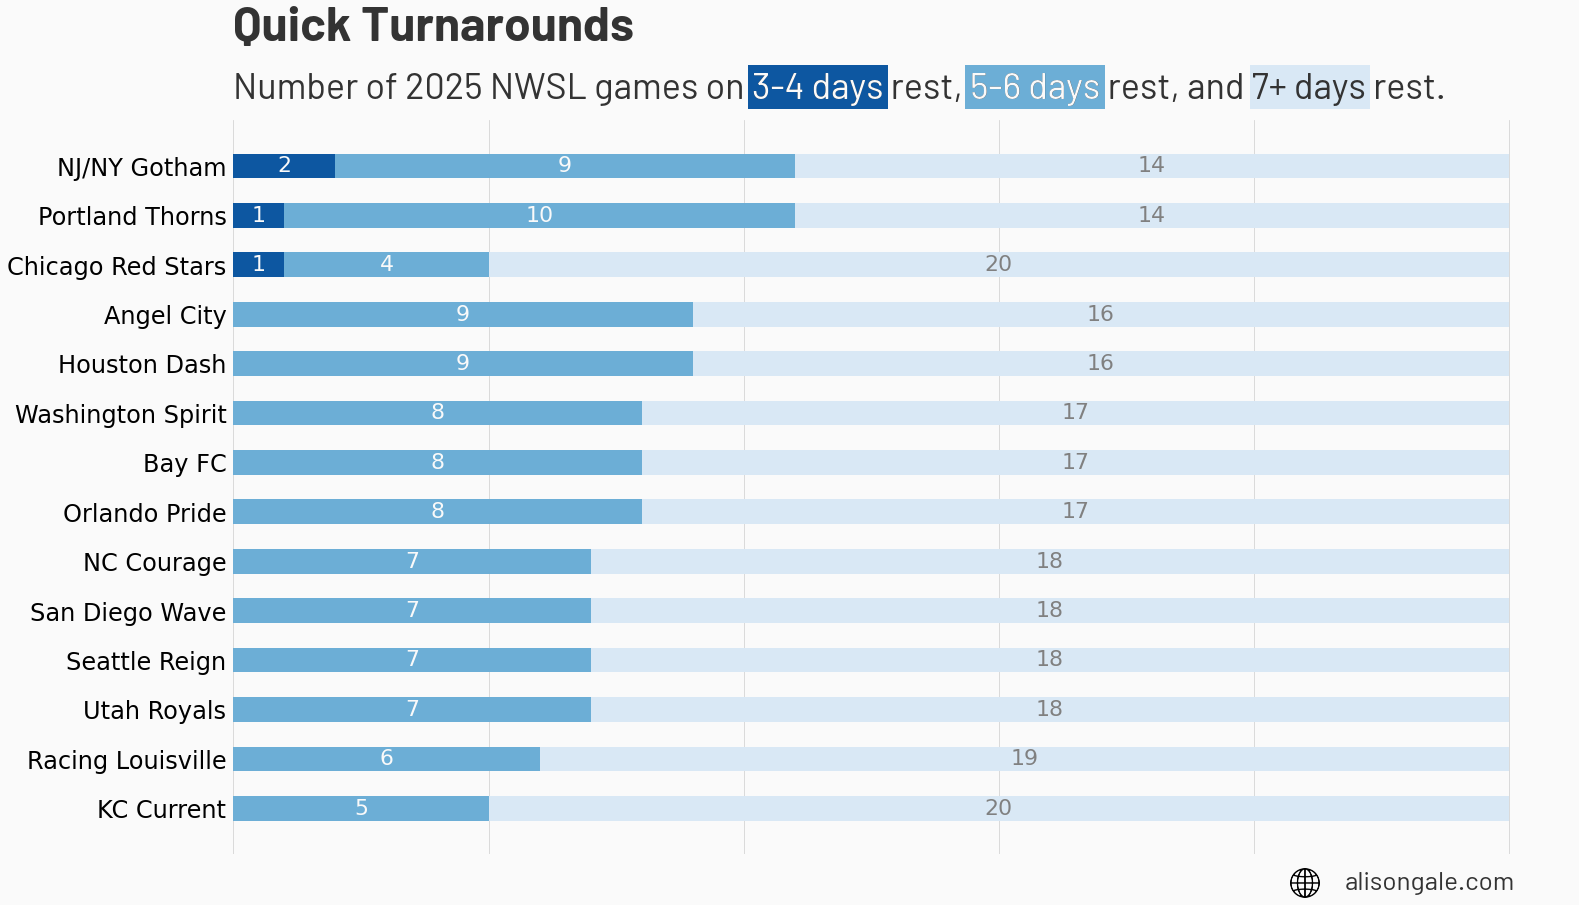

In [7]:
plt.clf()
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Title
plt.title(
    "Quick Turnarounds",
    fontproperties=Fonts.BARLOW_BOLD,
    size=48,
    color=Colors.BLACK,
    x=0,
    y=1.1,
    ha="left",
)

# Subtitle
fig.text(
    0,
    1.03,
    "Number of "
    + year
    + " NWSL games on 3-4 days rest, 5-6 days rest, and 7+ days rest.",
    fontproperties=Fonts.BARLOW,
    size=36,
    color=Colors.BLACK,
    transform=ax.transAxes,
    ha="left",
)
fig.patches.append(
    patches.Rectangle(
        (0.384, 1.015),
        0.105,
        0.06,
        edgecolor="none",
        facecolor=category_colors[0],
        transform=ax.transAxes,
    )
)
fig.text(
    0.387,
    1.03,
    "3-4 days",
    fontproperties=Fonts.BARLOW,
    size=36,
    color=Colors.WHITE,
    transform=ax.transAxes,
    ha="left",
)
fig.patches.append(
    patches.Rectangle(
        (0.546, 1.015),
        0.105,
        0.06,
        edgecolor="none",
        facecolor=category_colors[1],
        transform=ax.transAxes,
    )
)
fig.text(
    0.55,
    1.03,
    "5-6 days",
    fontproperties=Fonts.BARLOW,
    size=36,
    color=Colors.WHITE,
    transform=ax.transAxes,
    ha="left",
)
fig.patches.append(
    patches.Rectangle(
        (0.759, 1.015),
        0.09,
        0.06,
        edgecolor="none",
        facecolor=category_colors[2],
        transform=ax.transAxes,
    )
)

# Plot data
for i, (colname, color) in enumerate(zip(range(0, 5), category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)

    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = Colors.WHITE if r * g * b < 0.4 else Colors.GRAY
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        if c > 0:
            ax.text(
                x, y, str(int(c)), ha="center", va="center", color=text_color, size=22
            )

# General
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Axes
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.tick_params(axis="y", which="major", labelsize=24)
ax.tick_params(axis="x", which="major", labelsize=24, labelcolor=Colors.BLACK)
ax.set_xticks([0, 5, 10, 15, 20, 25])
ax.set_axisbelow(True)

add_signature(fig, x=0.73, y=0.08, fs=26, w=0.0305)

# Save image
plt.savefig("images/" + year + "_gaps.png", bbox_inches="tight", pad_inches=0.5)